## Machine Learning CA1 | Louis Wilkie | sba22529

### Introduction

#### Library Imports

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

#### Dataset Load

In [2]:
# dataset load
df = pd.read_csv("Invistico_Airline.csv")

In [3]:
sns.set_palette("viridis")

#### Selection of Functions Used

In [53]:
#  countplot
def countplot(df, var, x_size=4, y_size=4, title="Countplot", x_label="Values", y_label="Count",
             rotate_xticks=0):
    if title=="Countplot":
        title = f"Countplot of {var}"
    plt.figure(figsize=(x_size, y_size))
    sns.countplot(data=df, x=var)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotate_xticks)
    plt.title(title)
    plt.show()

In [41]:
# histogram
def histogram(df, var, x_size=4, y_size=4, x_label="Values", y_label="Frequency",
              bins=10, single_plot=True, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(x_size, y_size))
    
    sns.histplot(data=df, x=var, kde=False, bins=bins, color='green', ax=ax)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    title = f"Histogram of {var}"
    ax.set_title(title)
    
    if single_plot:
        plt.show()

### Data Exploration

In [6]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [7]:
df.shape

(129880, 23)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [9]:
df.describe(include="object").T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [11]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [12]:
# percentage of missing values
df["Arrival Delay in Minutes"].isnull().sum()/len(df) * 100

0.3025870033877425

In [16]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

#### Correlations

correlation shape: (19, 19)


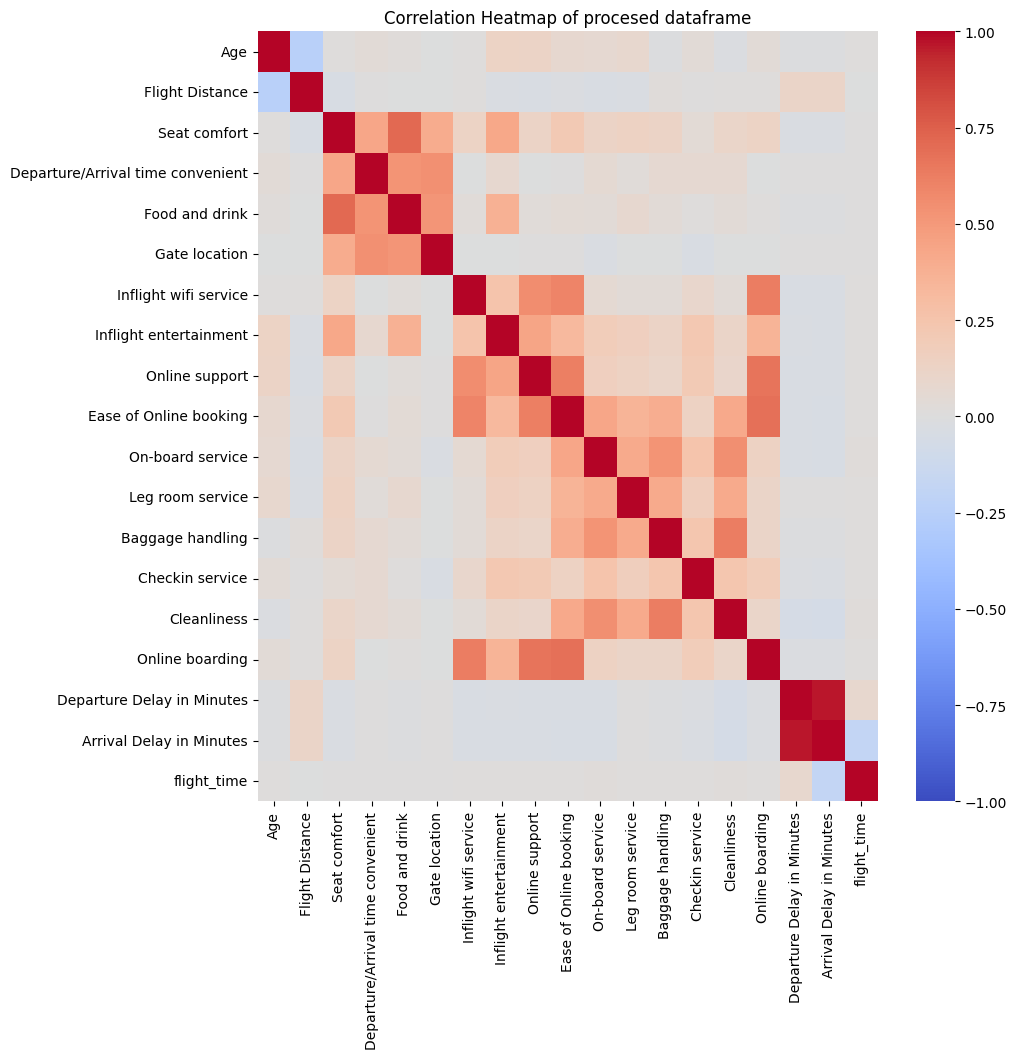

In [21]:
# correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(f"correlation shape: {correlation_matrix.shape}")

# correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of procesed dataframe')
plt.show()

#### Flight Time Difference

In [45]:
# correlation of delays
df["Departure Delay in Minutes"].corr(df["Arrival Delay in Minutes"])

0.9652911835463197

In [27]:
# flight time difference from schedule
df["flight_time_difference"] = df["Departure Delay in Minutes"] - df["Arrival Delay in Minutes"]
df["flight_time_difference"].describe()

count    129487.000000
mean         -0.447744
std          10.078293
min        -234.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          54.000000
Name: flight_time_difference, dtype: float64

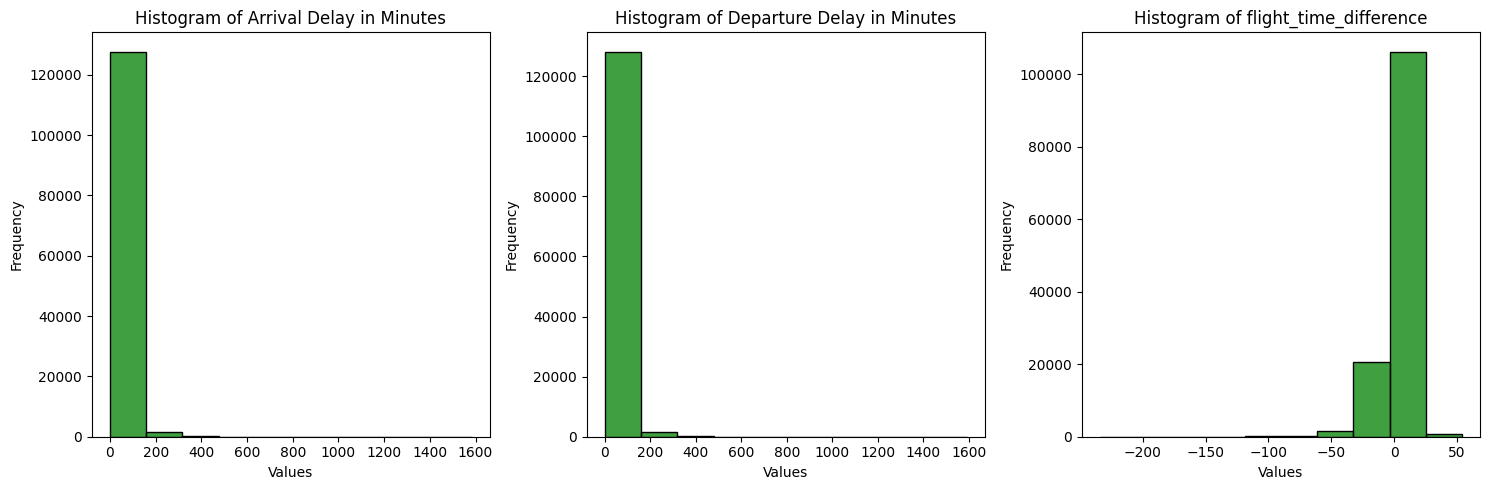

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0] = histogram(df, "Arrival Delay in Minutes", single_plot=False, ax=axs[0])
axs[1] = histogram(df, "Departure Delay in Minutes", single_plot=False, ax=axs[1])
axs[2] = histogram(df, "flight_time_difference", single_plot=False, ax=axs[2])

plt.tight_layout()
plt.show()

In [46]:
# arrival dropped as the signal is now captured in new column
df = df.drop("Arrival Delay in Minutes", axis=1)

In [ ]:
df["flight_time_difference"]

In [48]:
# Define bin edges and labels
bin_edges = [-float('inf'), 0, 2, float('inf')]
speed_labels = ['slower', 'average', 'quicker']

# Create a new column 'flight_speed' based on binning
df['flight_speed'] = pd.cut(df['flight_time_difference'], bins=bin_edges, labels=speed_labels)

In [50]:
df["flight_speed"].value_counts()

flight_speed
slower     92078
quicker    29667
average     7742
Name: count, dtype: int64

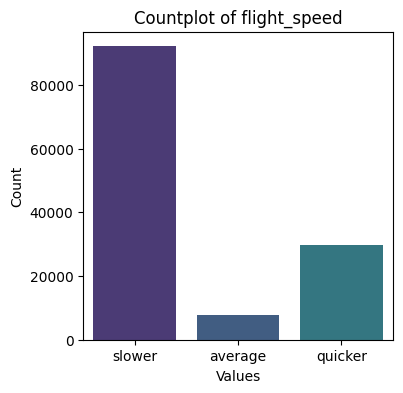

In [54]:
countplot(df, "flight_speed")

#### Continuous Variables

In [ ]:
histogram(df, "Age")

In [ ]:
histogram(df, "Flight Distance", bins=20)

In [ ]:
histogram(df, "Departure Delay in Minutes", bins=20)

In [ ]:
histogram(df, "Arrival Delay in Minutes", bins=20)

#### Ranks

In [ ]:
df.head()

In [ ]:
countplot(df, "Seat comfort", title="Seat comfort Countplot")

In [ ]:
countplot(df, "Departure/Arrival time convenient", title="Departure/Arrival time convenient Countplot")

In [ ]:
countplot(df, "Food and drink", title="Food and drink Countplot")

#### Categories

In [ ]:
df.describe(include="object")

In [ ]:
countplot(df, "Gender", title="Gender Countplot")

In [ ]:
countplot(df, "Customer Type", title="Customer Type Countplot")

In [ ]:
countplot(df, "Type of Travel", title="Type of Travel Countplot")

In [ ]:
countplot(df, "Class", title="Class Countplot")

#### Target variable

In [ ]:
# target variable
df.satisfaction.value_counts()

In [ ]:
# countplot of target variable
countplot(df, "satisfaction", title="Satisfaction Countplot")

In [ ]:
# countplot of female passengers
df1 = df[df["Gender"]=="Female"]
countplot(df1, "satisfaction", title="Satisfaction Countplot of Female Passangers")

In [ ]:
# countplot of male passengers
df1 = df[df["Gender"]=="Male"]
countplot(df1, "satisfaction", title="Satisfaction Countplot of Male Passangers")

In [ ]:
df["Customer Type"].unique()

In [ ]:
# countplot of loyal customers
df1 = df[df["Customer Type"]=="Loyal Customer"]
countplot(df1, "satisfaction", title="Satisfaction Countplot of Loyal Customers")

In [ ]:
# countplot of disloyal customers
df1 = df[df["Customer Type"]=="disloyal Customer"]
countplot(df1, "satisfaction", title="Satisfaction Countplot of Disloyal Customers")

### Data Preparation

#### Null values

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

#### Renaming columns

In [ ]:
# renaming rules
df.rename(columns=lambda x: x.replace(' service', ''), inplace=True)
df.rename(columns=lambda x: x.replace('Inflight ', ''), inplace=True)
df.rename(columns=lambda x: x.replace(' in Minutes', ''), inplace=True)

# renaming single columns
df.rename(columns={'Ease_of_Online_booking': 'online_booking'}, inplace=True)
df.rename(columns={'Food_and_drink': 'food'}, inplace=True)
df.rename(columns={'Departure/Arrival time convenient': 'flight_schedule'}, inplace=True)
df.rename(columns={'Type_of_Travel': 'type'}, inplace=True)

# underscores
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

# making all lowercase
df.columns = df.columns.str.lower()

#### Splitting target

In [ ]:
y = df.satisfaction

In [ ]:
X = df.drop("satisfaction", axis=1)

In [ ]:
X.info()

#### Binning Age

In [ ]:
# Define bins for every 10 years up to 90
bins = [i for i in range(0, 91, 10)]

# Create labels for the bins
labels = [f'{i}-{i+9}' for i in range(0, 81, 10)]  # Adjusted labels

# Use pd.cut to bin the 'age' column and create the new column
X['age'] = pd.cut(X['age'], bins=bins, labels=labels, right=False)

#### Binning Flight Time Difference

In [30]:
df["flight_time_difference"].describe()

count    129487.000000
mean         -0.447744
std          10.078293
min        -234.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          54.000000
Name: flight_time_difference, dtype: float64

#### Encoding

In [ ]:
# continuous columns will be scaled
X_numeric = X[["flight_distance", "departure_delay", "arrival_delay"]]
X_ranks = X.drop(X_numeric.columns, axis=1)

# label encoding binary categories
X_binary = X[["gender", "customer_type", "type_of_travel"]]
X_ranks = X_ranks.drop(X_binary.columns, axis=1)

In [ ]:
# binary categories encoded
X_binary = pd.get_dummies(X_binary, columns=X_binary.columns, drop_first=True).astype(int)
X_binary.head()

In [ ]:
# rest of independent encoding
X_ranks = pd.get_dummies(X_ranks, columns=X_ranks.columns).astype(int)
X_ranks.head()

In [ ]:
# target variable
y

In [ ]:
# label encoding target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# satisfied is 1, unsatisfied 0
y

#### Scaling

In [ ]:
X_binary.shape

In [ ]:
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [ ]:
X_numeric = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns)

#### merge X

In [ ]:
X_prepared = pd.concat([X_numeric, X_binary], axis=1)

In [ ]:
X_prepared = pd.concat([X_prepared, X_ranks], axis=1)

In [ ]:
X_prepared

#### Correlations

In [ ]:
correlation_matrix = X_prepared.corr()
correlation_matrix.shape

In [ ]:
# correlation matrix
correlation_matrix = X_prepared.corr()
print(f"correlation shape: {correlation_matrix.shape}")

# correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of procesed dataframe')
plt.show()

In [ ]:
X_prepared.head()

In [ ]:
# arrival and departure de
X_prepared.iloc[:,:5].corr()

In [ ]:
#### 

### Modelling